<a href="https://colab.research.google.com/github/pchernic/Imbalanced_data/blob/main/%5Bdnc%5D_Streaming_Customer_Churn_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing Customer Churn

**Context:**


You work at a streaming platform, and the management is concerned about the high rate of users canceling their subscriptions. They believe it is possible to predict whether a user is more likely to leave the platform before it happens, and based on this information, take actions to reduce churn. Your goal is to create a classification model capable of predicting whether a user is more likely to cancel their subscription on the platform or not. To achieve this, the company has provided a CSV dataset containing customer account data.

## Libs

In [27]:
import pandas as pd
import numpy as np



## Load

In [28]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [55]:
df = pd.read_csv('/content/drive/MyDrive/streaming_data.csv')
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


## Data Understanding

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [57]:
df.shape

(77884, 10)

In [58]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,66607.0,43.511072,15.043158,18.0,30.00,43.00,57.0,69.0
Time_on_platform,56464.0,4385.848505,2526.580859,0.0,2196.00,4384.00,6573.0,8759.0
Devices_connected,52696.0,2.995370,1.414072,1.0,2.00,3.00,4.0,5.0
Num_streaming_services,9572.0,2.496239,1.120700,1.0,1.00,2.00,4.0,4.0
Num_active_profiles,77884.0,3.002273,1.413235,1.0,2.00,3.00,4.0,5.0
Avg_rating,60614.0,3.002252,1.154963,1.0,1.99,3.01,4.0,5.0
Churned,61148.0,0.243066,0.428938,0.0,0.00,0.00,0.0,1.0


In [59]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,66607.0,NaN,NaN,NaN,43.511072,15.043158,18.0,30.0,43.0,57.0,69.0
Gender,63368,2,Male,31796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_on_platform,56464.0,NaN,NaN,NaN,4385.848505,2526.580859,0.0,2196.0,4384.0,6573.0,8759.0
Devices_connected,52696.0,NaN,NaN,NaN,2.99537,1.414072,1.0,2.0,3.0,4.0,5.0
Subscription_type,52663,3,Premium,17625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_streaming_services,9572.0,NaN,NaN,NaN,2.496239,1.1207,1.0,1.0,2.0,4.0,4.0
Num_active_profiles,77884.0,NaN,NaN,NaN,3.002273,1.413235,1.0,2.0,3.0,4.0,5.0
Avg_rating,60614.0,NaN,NaN,NaN,3.002252,1.154963,1.0,1.99,3.01,4.0,5.0
Churned,61148.0,NaN,NaN,NaN,0.243066,0.428938,0.0,0.0,0.0,0.0,1.0
User_id,77884,65481,9c66e5a1-0541-4496-8fbc-ee425ee08b78,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Visualization [Raw Data]

Let's visualize how Churn relates to other variables.


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

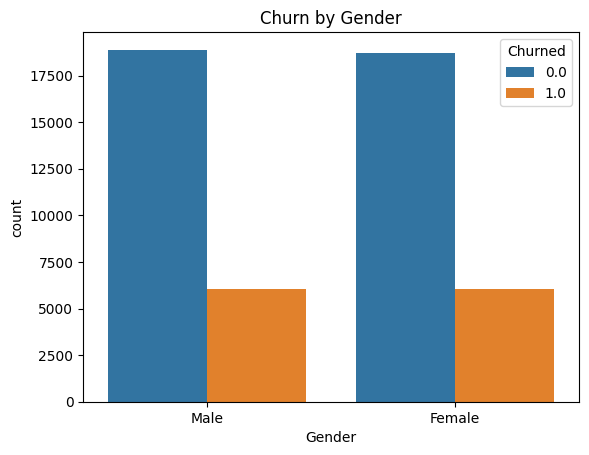

In [61]:


# Example: Churn by Gender
sns.countplot(x='Gender', hue='Churned', data=df)
plt.title('Churn by Gender')
plt.show()




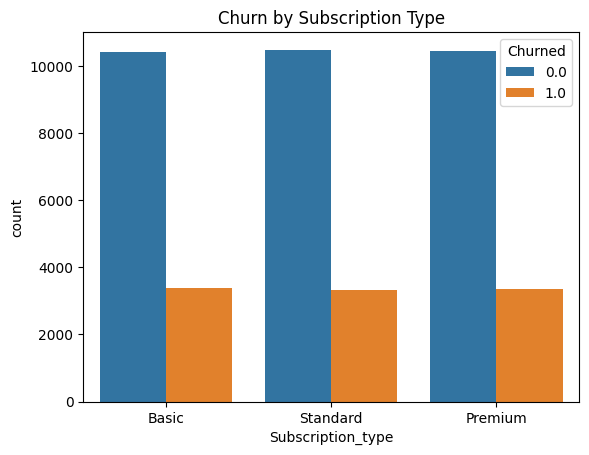

In [62]:
# Example: Churn by Subscription Type
sns.countplot(x='Subscription_type', hue='Churned', data=df)
plt.title('Churn by Subscription Type')
plt.show()

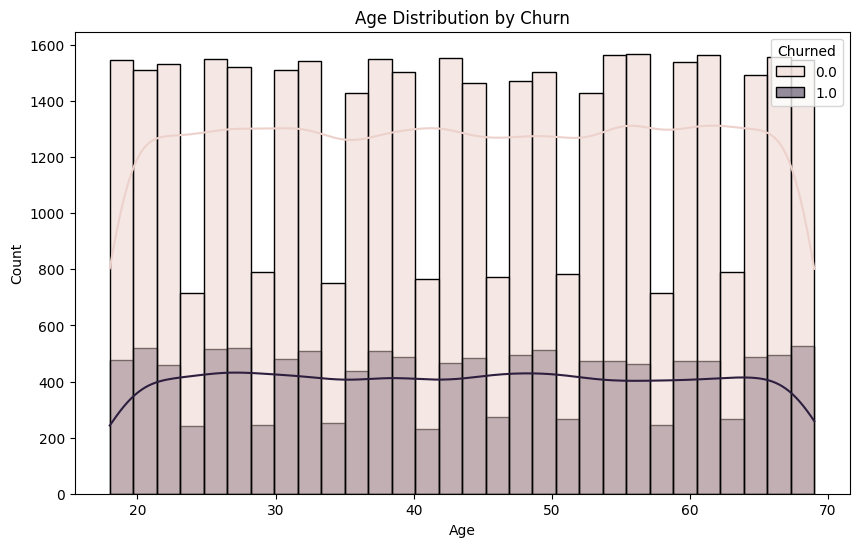

In [63]:
# Example: Age Distribution by Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Churned', kde=True, bins=30)
plt.title('Age Distribution by Churn')
plt.show()


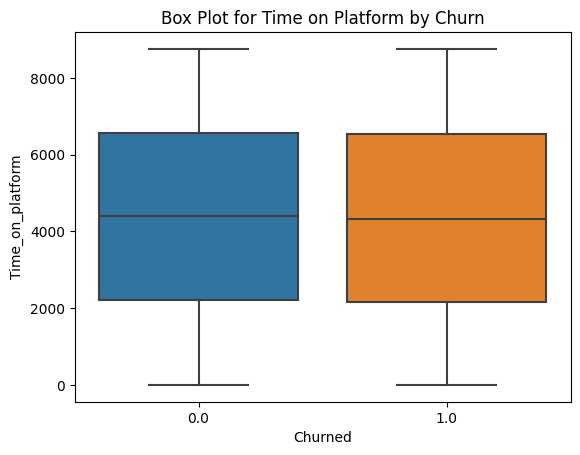

In [64]:
# Example: Box Plot for Time on Platform by Churn
sns.boxplot(x='Churned', y='Time_on_platform', data=df)
plt.title('Box Plot for Time on Platform by Churn')
plt.show()


<ipython-input-65-45c6186e7ca4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


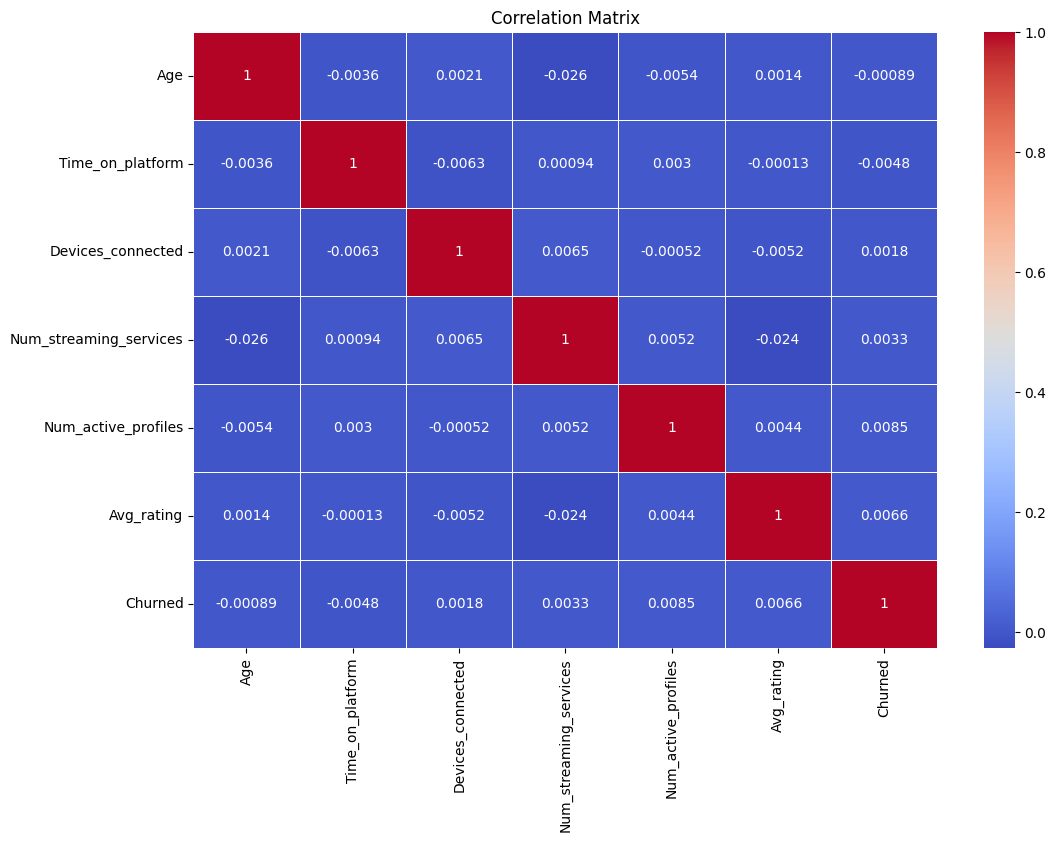

In [65]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


## Data Preparation


**Steps:**

These instructions outline the specific data preprocessing and transformation steps to be applied to the dataset.


1. Replace "NaN" values with 0 in columns → Time_on_platform, Num_streaming_services, Churned, Avg_rating, Devices_connected.
2. Drop rows with null values in columns Gender, Subscription_type, and Age.
3. Transform "Churned" values of 0 and 1 to "No" and "Yes."
4. Convert float values to integer values.



In [66]:
# 1. Replace "NaN" values with 0 in specific columns
columns_to_replace_nan = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
df[columns_to_replace_nan] = df[columns_to_replace_nan].fillna(0)

# 2. Drop rows with missing values in the columns Gender, Subscription_type, and Age
df.dropna(subset=['Gender', 'Subscription_type', 'Age'], inplace=True)

# 3. Transform "Churned" values 0 and 1 to "No" and "Yes"
df['Churned'] = df['Churned'].map({0: 'No', 1: 'Yes'})

# 4. Convert float values to integers
columns_to_convert_to_int = ['Time_on_platform', 'Num_streaming_services', 'Avg_rating', 'Devices_connected']
df[columns_to_convert_to_int] = df[columns_to_convert_to_int].astype(int)

# Checking the data after the treatment
df.tail()


,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
77879,45.0,Male,0,0,Basic,0,5,2,No,6b51fe0d-d4a1-41ed-a55c-d05f5c961e3c
77880,47.0,Female,6176,0,Premium,0,2,4,No,59d70167-6be0-474c-b71e-14153205b44f
77881,64.0,Female,0,5,Premium,0,1,4,Yes,a7d5ed26-78a4-4e70-bd04-0fec883e56aa
77882,58.0,Male,1314,5,Standard,0,4,0,No,472e9e70-87ca-4c5e-bfee-fa9f42b54f51
77883,68.0,Female,7078,1,Standard,0,5,1,No,f8450244-52b1-4303-9275-00a1d4fbc331


In [67]:
df.isnull().sum()

Age                       0
Gender                    0
Time_on_platform          0
Devices_connected         0
Subscription_type         0
Num_streaming_services    0
Num_active_profiles       0
Avg_rating                0
Churned                   0
User_id                   0
dtype: int64

## Data Visualization [Treated Data]

Let's visualize how Churn relates to other variables.


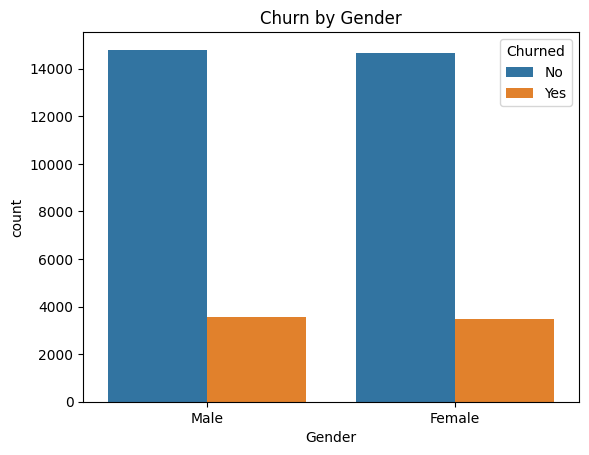

In [68]:


# Example: Churn by Gender
sns.countplot(x='Gender', hue='Churned', data=df)
plt.title('Churn by Gender')
plt.show()




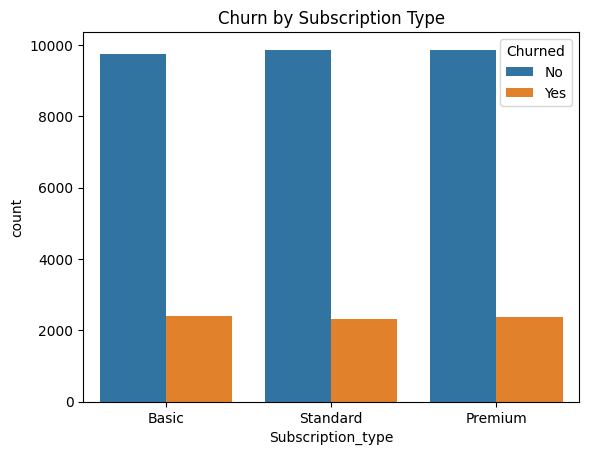

In [69]:
# Example: Churn by Subscription Type
sns.countplot(x='Subscription_type', hue='Churned', data=df)
plt.title('Churn by Subscription Type')
plt.show()

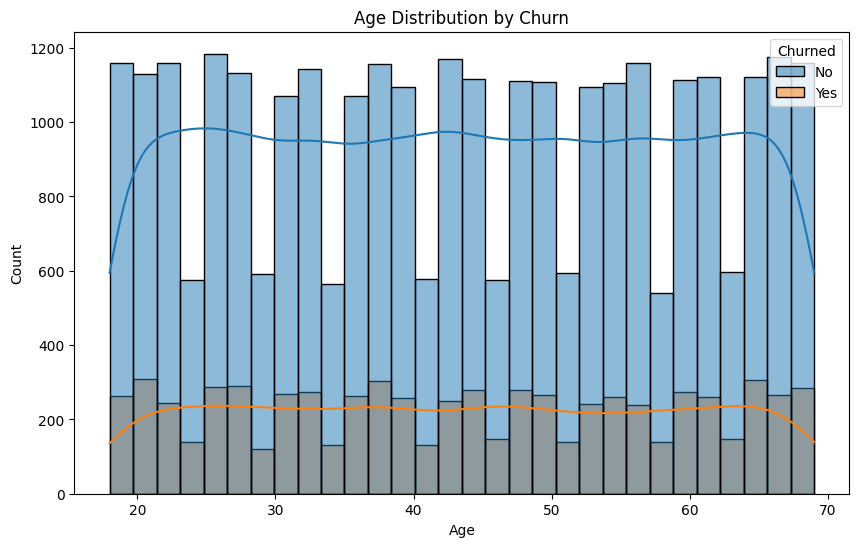

In [70]:
# Example: Age Distribution by Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Churned', kde=True, bins=30)
plt.title('Age Distribution by Churn')
plt.show()


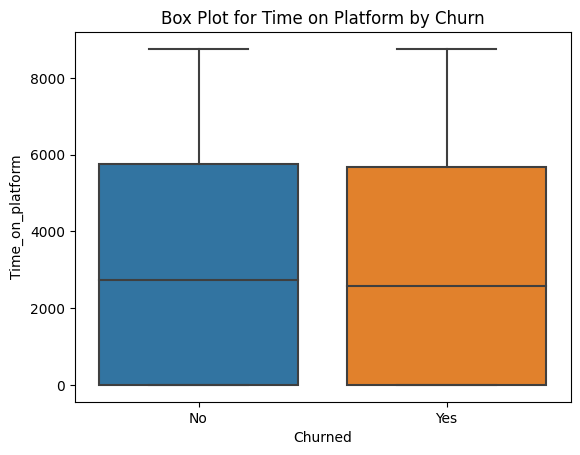

In [71]:
# Example: Box Plot for Time on Platform by Churn
sns.boxplot(x='Churned', y='Time_on_platform', data=df)
plt.title('Box Plot for Time on Platform by Churn')
plt.show()


<ipython-input-72-45c6186e7ca4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


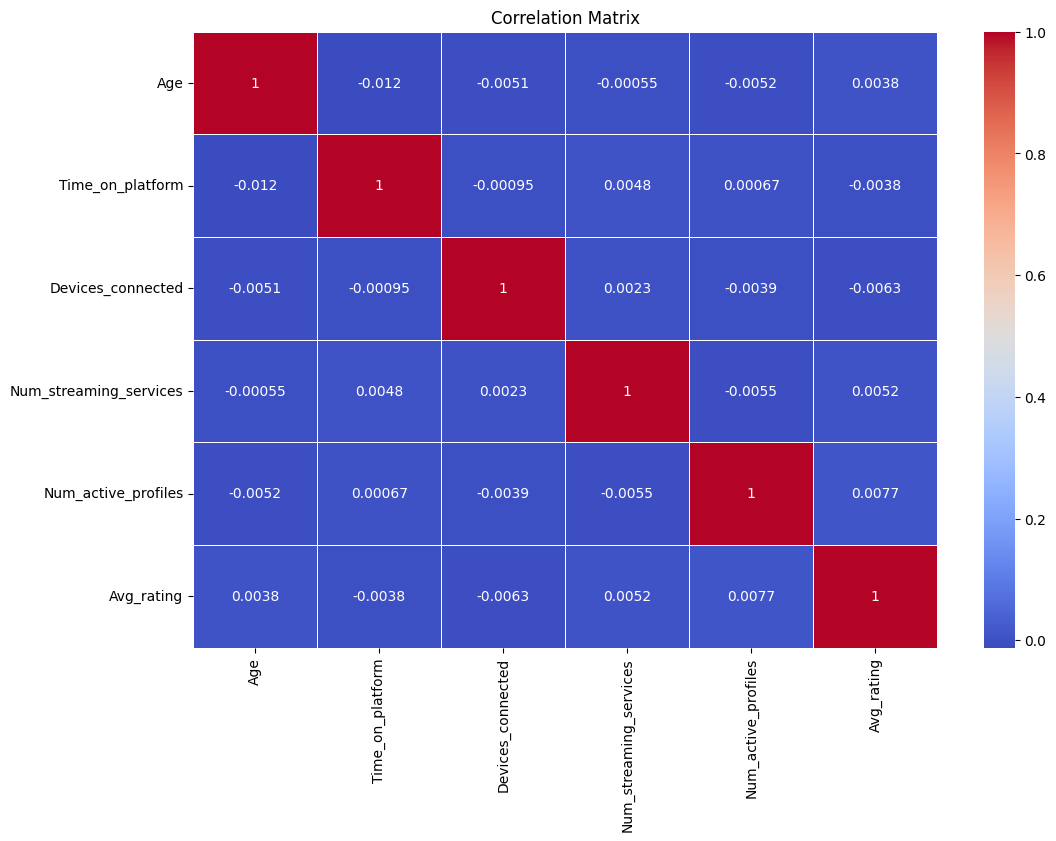

In [72]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


# **Modeling:**

## Modeling: LogisticRegression

**Steps:**

These instructions outline the steps involved in building, training, and evaluating a machine learning model.

a. Define variables X and y for the model.

b. Perform the model .fit.

c. Split into train and test sets.

d. Perform the modeling.

e. Plot the confusion matrix.

f. Print metrics.



### Libs

In [36]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Model Settings and Visualization

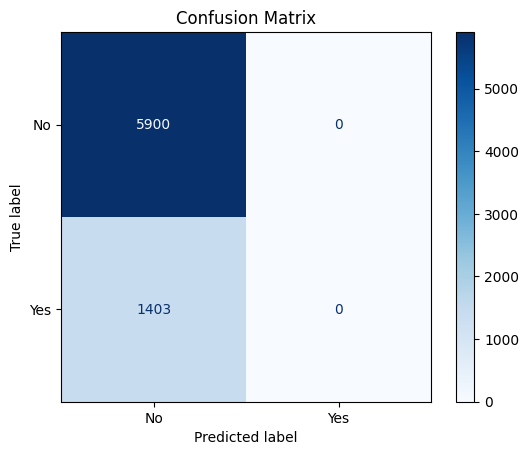

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          No       0.81      1.00      0.89      5900
         Yes       0.00      0.00      0.00      1403

    accuracy                           0.81      7303
   macro avg       0.40      0.50      0.45      7303
weighted avg       0.65      0.81      0.72      7303



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# 1. Define variables X and y for the model
X = df.drop(['Churned', 'User_id'], axis=1)  # Removing the 'User_id' column
y = df['Churned']

# 2. Data preprocessing
# Encode categorical variables (Gender and Subscription_type)
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['Subscription_type'] = label_encoder.fit_transform(X['Subscription_type'])

# Data normalization
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# 3. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Perform the fit of the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Modeling and predictions
y_pred = model.predict(X_test)

# 6. Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# 7. Print metrics
print(classification_report(y_test, y_pred))


###**Logistic Regression Model: Assessment**



The results from the classification report include **precision, recall, F1-score, support**


- **Precision: Precision measures the accuracy of positive predictions.** In this context, for the **"No" class, the precision is 0.81, which means that 81% of the predicted "No" cases were correct. However, for the "Yes" class, the precision is 0.00, indicating that none of the predicted "Yes" cases were correct.**

- **Recall:** Recall **measures the ability to correctly identify positive cases.** For the "No" class, **the recall is 1.00, indicating that all actual "No" cases were correctly identified.** However, for the **"Yes" class, the recall is 0.00, meaning none of the actual "Yes" cases were identified.**

- **F1-Score:** The F1-score **is the harmonic mean of precision and recall.** For the "No" class, the F1-score is 0.89, and for the "Yes" class, it's 0.00. The F1-score provides a balance between precision and recall.

- **Support:** This is the number of occurrences of each class in the test dataset. There are 5900 samples for the "No" class and 1403 samples for the "Yes" class.

- **Accuracy:** The overall accuracy of the model is 0.81, which means that it correctly predicted 81% of the total cases.

In summary, **the model performs well for predicting the "No" class (users who didn't churn) with high precision and recall. However, it performs very poorly for predicting the "Yes" class (users who did churn), as indicated by the very low precision, recall, and F1-score for that class.** This suggests that the model is not effective in identifying users who churn, and it may require further improvement, potentially by addressing the class imbalance or using a different model. **The "UndefinedMetricWarning" messages suggest that the model did not make any predictions for the "Yes" class, which is a serious issue that needs to be addressed.**

## Modeling: RandomForest

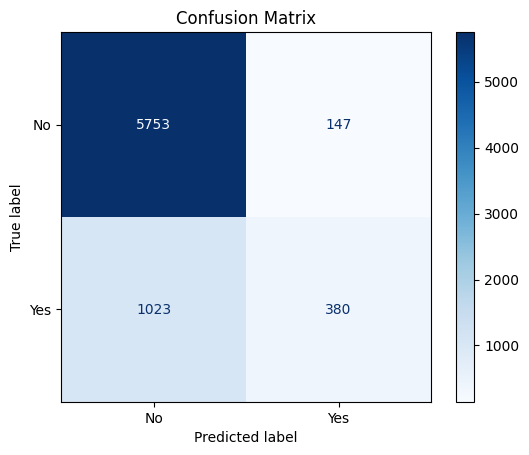

              precision    recall  f1-score   support

          No       0.85      0.98      0.91      5900
         Yes       0.72      0.27      0.39      1403

    accuracy                           0.84      7303
   macro avg       0.79      0.62      0.65      7303
weighted avg       0.82      0.84      0.81      7303



In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay



# Define feature variables (X) and the target variable (y)
X = df.drop(['Churned', 'User_id'], axis=1)
y = df['Churned']

# Encode categorical variables
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['Subscription_type'] = label_encoder.fit_transform(X['Subscription_type'])

# Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))


### **Random Forest Model's Assessment**

The classification report using Random Forest model for predicting churn (Yes/No) is based on precision, recall, F1-score, support, and other metrics.


- **Precision:** Precision measures the accuracy of positive predictions. For the "No" class, the precision **is 0.85, which means that 85% of the predicted "No" cases were correct. For the "Yes" class, the precision is 0.72, indicating that 72% of the predicted "Yes" cases were correct,** which is not ideal, though better than Logistic Regression.

- **Recall:** Recall measures the ability to correctly identify positive cases. **For the "No" class, the recall is 0.98, indicating that 98% of the actual "No" cases were correctly identified. For the "Yes" class, the recall is 0.27, suggesting that only 27% of the actual "Yes" cases were identified.** So, for "No" class it did worse than Logistic Regression, but for "Yes" cases, it performed slightly better.

- **F1-Score:** The F1-score is the harmonic mean of precision and recall. **For the "No" class, the F1-score is 0.91, indicating a good balance between precision and recall. However, for the "Yes" class, the F1-score is 0.39, suggesting that there is room for improvement.**

- **Support:** This is the number of occurrences of each class in the test dataset. There are 5900 samples for the "No" class and 1403 samples for the "Yes" class.

- **Accuracy:** The overall accuracy of the model is 0.84, which means that it correctly predicted 84% of the total cases.

**In summary**, the Random Forest model **performs quite well for the "No" class with high precision and recall, suggesting it's effective at predicting non-churn cases. However, it struggles with the "Yes" class, as indicated by the lower precision, recall, and F1-score. The recall for the "Yes" class has improved compared to the previous model, but it's still relatively low.** Further improvements may be needed to better identify churn cases.

## SMOTE - Synthetic Minority Over-sampling Technique (SMOTE)

The idea here is to create synthetic examples for the minority class (in this case, "Yes" churn cases) and balance the class distribution.

In [39]:
pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


### Libs

In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

### Modeling: Random Forest with SMOTE

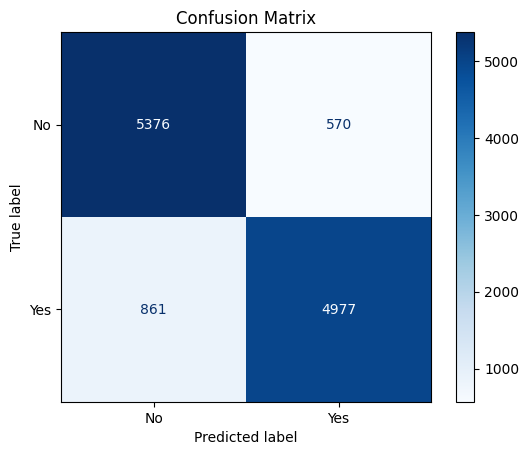

              precision    recall  f1-score   support

          No       0.86      0.90      0.88      5946
         Yes       0.90      0.85      0.87      5838

    accuracy                           0.88     11784
   macro avg       0.88      0.88      0.88     11784
weighted avg       0.88      0.88      0.88     11784



In [43]:
# Define feature variables (X) and the target variable (y)
X = df.drop(['Churned', 'User_id'], axis=1)
y = df['Churned']

# Encode categorical variables
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['Subscription_type'] = label_encoder.fit_transform(X['Subscription_type'])

# Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))


####**SMOTE Random Forest Model Assessment**

The classification report using the Synthetic Minority Over-sampling Technique (SMOTE) applied to address the class imbalance allows us to interpret and compare these results to the previous models in the following way:

- **Precision:** For the "No" class, the precision is 0.86, which means that 86% of the predicted "No" cases were correct. For the **"Yes" class, the precision is 0.90, indicating that 90% of the predicted "Yes" cases were correct. Both precision values are relatively high and balanced.**

- **Recall:** For the "No" class, the recall is 0.90, meaning that 90% of the actual "No" cases were correctly identified. For the **"Yes" class, the recall is 0.85, indicating that 85% of the actual "Yes" cases were identified. Both recall values are well-balanced, and the "Yes" class recall has significantly improved compared to the previous models.**

- **F1-Score:** The F1-scores are balanced for both classes. For the "No" class, the F1-score is 0.88, and for the "Yes" class, it's 0.87. These scores represent a good trade-off between precision and recall for both classes.

- **Support:** There are now 5946 samples for the "No" class and 5838 samples for the "Yes" class. The class distribution is much more balanced compared to the previous models.

- **Accuracy:** The overall accuracy of the model is 0.88, indicating that it correctly predicted 88% of the total cases.

Comparing to the previous models:
- The precision, recall, and F1-scores are more balanced for both the "No" and "Yes" classes, **which suggests that the model performs well in identifying both churn (Yes) and non-churn (No) cases.**
- The **accuracy has also improved, indicating better overall model performance.**

The **SMOTE technique effectively addressed the class imbalance issue and resulted in a more balanced and accurate model for predicting churn. This model is a substantial improvement over the previous ones, especially in terms of identifying churn cases ("Yes").**

### Modeling: Logistic Regression with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression


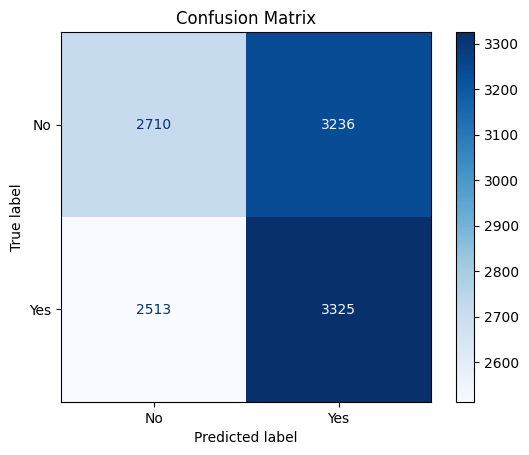

              precision    recall  f1-score   support

          No       0.52      0.46      0.49      5946
         Yes       0.51      0.57      0.54      5838

    accuracy                           0.51     11784
   macro avg       0.51      0.51      0.51     11784
weighted avg       0.51      0.51      0.51     11784



In [44]:
# Define feature variables (X) and the target variable (y)
X = df.drop(['Churned', 'User_id'], axis=1)
y = df['Churned']

# Encode categorical variables
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['Subscription_type'] = label_encoder.fit_transform(X['Subscription_type'])

# Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create and train the Logistic Regression classifier
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

####**SMOTE Logistic Regression Model Assessment**

The results from the Logistic Regression model with SMOTE to address the class imbalance are as follows:

- **Precision:** For the "No" class, the precision is 0.52, which means that 52% of the predicted "No" cases were correct. For the "Yes" class, the precision is 0.51, indicating that 51% of the predicted "Yes" cases were correct. Both precision values are roughly balanced.

- **Recall:** For the "No" class, the recall is 0.46, indicating that 46% of the actual "No" cases were correctly identified. For the "Yes" class, the recall is 0.57, suggesting that 57% of the actual "Yes" cases were identified. Both recall values have improved compared to the initial model, but they are still relatively moderate.

- **F1-Score:** The F1-scores are balanced for both classes. For the "No" class, the F1-score is 0.49, and for the "Yes" class, it's 0.54. These scores represent a reasonable trade-off between precision and recall for both classes.

- **Support:** There are 5946 samples for the "No" class and 5838 samples for the "Yes" class. The class distribution is balanced due to SMOTE.

- **Accuracy:** The overall accuracy of the model is 0.51, indicating that it correctly predicted 51% of the total cases.

Compared to the previous Random Forest model with SMOTE, this Logistic Regression model has a more balanced class distribution. **However, the model's performance in terms of precision, recall, and F1-scores for both classes is moderate and similar for both classes. There is still room for improvement in identifying churn (Yes) cases. Additional feature engineering or hyperparameter tuning may help enhance the model's performance further.**

## Modeling: Gradient Boosting with XGBoost

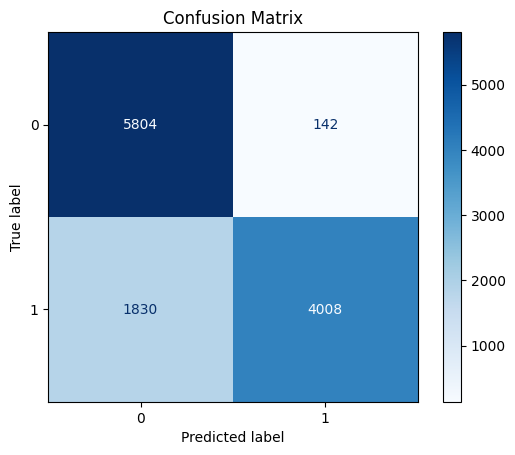

              precision    recall  f1-score   support

          No       0.76      0.98      0.85      5946
         Yes       0.97      0.69      0.80      5838

    accuracy                           0.83     11784
   macro avg       0.86      0.83      0.83     11784
weighted avg       0.86      0.83      0.83     11784



In [47]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



# Define feature variables (X) and the target variable (y)
X = df.drop(['Churned', 'User_id'], axis=1)
y = df['Churned']


# Encode categorical variables
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['Subscription_type'] = label_encoder.fit_transform(X['Subscription_type'])

# Encode the target variable 'Churned' as 0 for 'No' and 1 for 'Yes'
y = label_encoder.fit_transform(y)

# Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Use numerical labels for the confusion matrix
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))  # Provide labels for the classification report

####**SMOTE Gradient Boosting: Model Assessment**

The results from the XGBoost model with SMOTE to address the class imbalance are as follows:

- **Precision:** For the "No" class, the precision is 0.76, which means that 76% of the predicted "No" cases were correct. For the "Yes" class, the precision is 0.97, indicating that 97% of the predicted "Yes" cases were correct. These precision values are quite high.

- **Recall:** For the "No" class, the recall is 0.98, meaning that 98% of the actual "No" cases were correctly identified. For the "Yes" class, the recall is 0.69, suggesting that 69% of the actual "Yes" cases were identified. The recall for the "Yes" class has significantly improved compared to the previous models, but it is still lower than the recall for the "No" class.

- **F1-Score:** The F1-scores are balanced for both classes. For the "No" class, the F1-score is 0.85, and for the "Yes" class, it's 0.80. These scores represent a good trade-off between precision and recall for both classes.

- **Support:** There are 5946 samples for the "No" class and 5838 samples for the "Yes" class. The class distribution is balanced due to SMOTE.

- **Accuracy:** The overall accuracy of the model is 0.83, indicating that it correctly predicted 83% of the total cases.

Compared to the previous Logistic Regression model with SMOTE, this XGBoost model shows improved precision and recall for both classes. It is particularly effective in correctly identifying non-churn cases ("No"). However, it still has room for improvement in identifying churn cases ("Yes").

These results represent a trade-off between precision and recall, and the choice between the two may depend on the specific business objectives.